In [93]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [94]:
bos.columns =['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX' ,'RM' ,'AGE' ,'DIS' ,'RAD' ,'TAX' ,'PTRATIO','B','LSTAT']

In [95]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [96]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [97]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [98]:
boston["PRICE"] = boston.target

In [99]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [100]:
bos.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

In [101]:
bos.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [102]:
boston["PRICE"] = boston.target

In [103]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [104]:
X = boston["PRICE"] # dependent value

In [105]:
X = pd.Series(X)
X

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [106]:
y = bos
data = pd.concat((X,y), axis = 1)

In [107]:
data.columns = ['PRICE','CRIM', 'ZN', 'INDUS','CHAS' ,'NOX' ,'RM', 'AGE', 'DIS', 'RAD' ,'TAX' ,'PTRATIO', 'B' ,'LSTAT']

<AxesSubplot:>

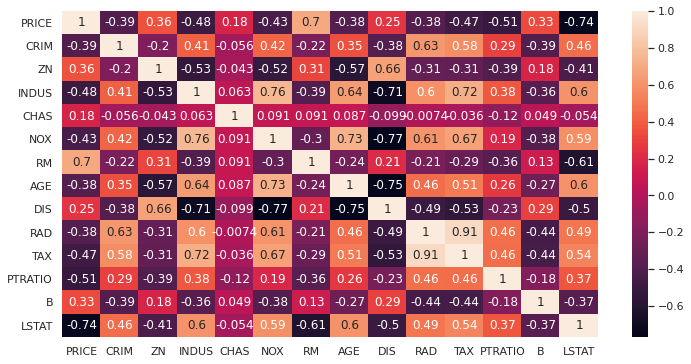

In [108]:
plt.figure(figsize=(12,6))
corr_val=data.corr()
sns.heatmap(data=corr_val,annot=True)

In [109]:
data = data[['LSTAT','PRICE','PTRATIO','RM']]

<AxesSubplot:>

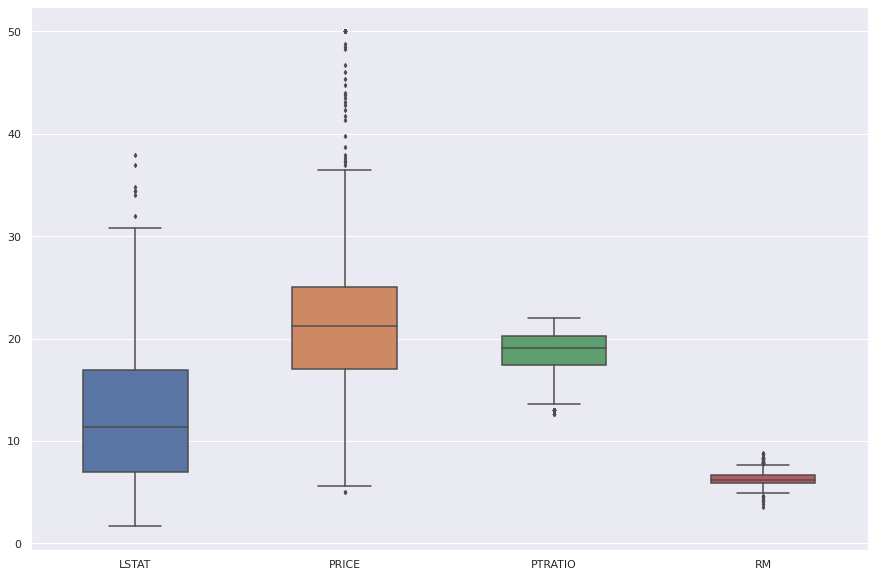

In [110]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [111]:
q = data['PRICE'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['PRICE']<q]
q = data_cleaned['PRICE'].quantile(0.99)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data_cleaned[data_cleaned['LSTAT']<q]
q = data_cleaned['PRICE'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data_cleaned[data_cleaned['RM']<q]

/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

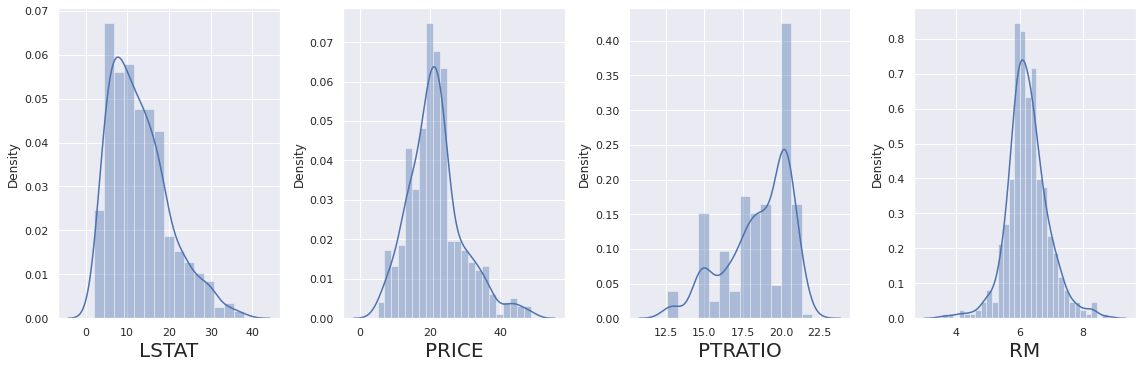

In [112]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned :
    if plotnumber<=16 :
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [113]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [130]:
y = data_cleaned['PRICE']
X = data_cleaned[['RM','LSTAT','PTRATIO']]

In [131]:
X

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
501,6.593,9.67,21.0
502,6.120,9.08,21.0
503,6.976,5.64,21.0
504,6.794,6.48,21.0


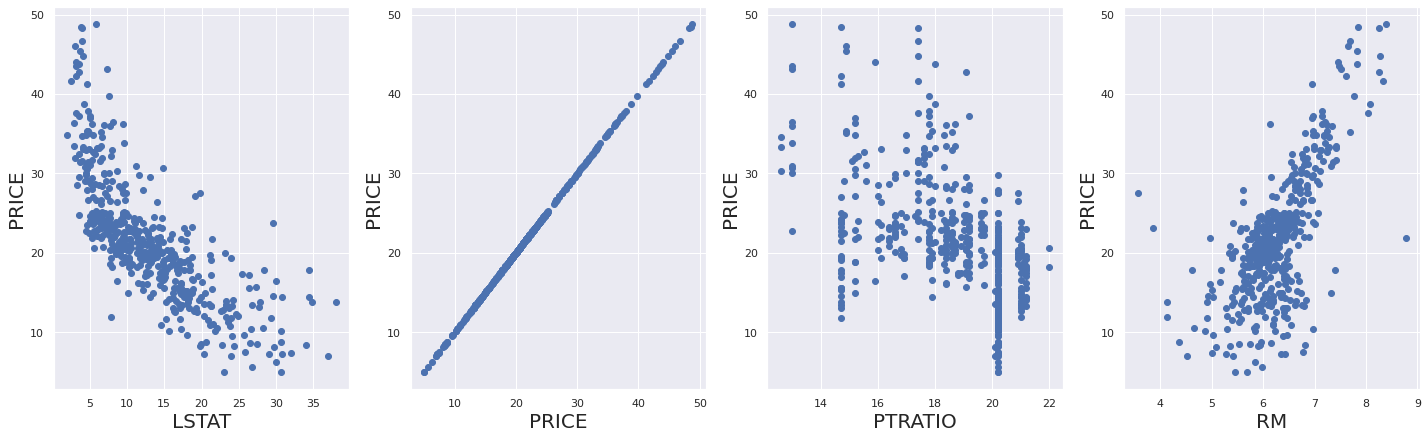

In [116]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in data_cleaned :
    if plotnumber<=15 :
        ax = plt.subplot(5,4,plotnumber)
        plt.scatter(data_cleaned [column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PRICE',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

variables = X_scaled 

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [134]:
vif

,VIF,Features
0,1.610211,RM
1,1.688073,LSTAT
2,1.158871,PTRATIO


In [135]:
# create X and y
X = data_cleaned['PRICE'].values.reshape(-1,1)
y = data_cleaned[['RM','LSTAT','PTRATIO']]
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

[ 5.01180826 27.72903934 21.53097923]
[[ 0.05701922]
 [-0.68427966]
 [-0.13916577]]


In [136]:
import statsmodels.formula.api as smf
#lm = smf.ols(formula = 'PRICE ~ CRIM + ZN +INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT' , data=data).fit()

lm = smf.ols(formula = 'PRICE ~ PTRATIO  + LSTAT + RM  ', data=data_cleaned).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     401.7
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          3.79e-131
Time:                        10:10:25   Log-Likelihood:                -1399.9
No. Observations:                 490   AIC:                             2808.
Df Residuals:                     486   BIC:                             2825.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.5589      3.247      6.639      0.000      15.179      27.939
PTRATIO       -0.9503      0.098     -9.741      0.000      -1.142      -0.759
LSTAT         -0.5222      0.035    -14.886      0.000      -0.591      -0.453
RM             3.9111      0.372     10.525      0.000       3.181       4.641
==============================================================================
Omnibus:                       53.446   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.064
Skew:                           0.726   Prob(JB):                     9.18e-19
Kurtosis:                       4.401   Cond. No.                         409.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
lm.rsquared

0.7126161939424787

In [138]:
# instantiate, fit
feature_cols = ['RM'+ 'PTRATIO'  + 'LSTAT']
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print(feature_cols, lm.coef_)

['RMPTRATIOLSTAT'] [[ 0.05701922]
 [-0.68427966]
 [-0.13916577]]


In [141]:
y = data_cleaned['PRICE']

In [142]:
X_scaled

array([[ 0.50503976, -1.12267925, -1.52727975],
       [ 0.26901737, -0.53477219, -0.34150355],
       [ 1.43993368, -1.25693687, -0.34150355],
       ...,
       [ 1.11961757, -1.02940553,  1.17628999],
       [ 0.84068201, -0.91069353,  1.17628999],
       [-0.33023431, -0.71284019,  1.17628999]])

In [143]:
#Train The model
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [144]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [145]:
regression.score(x_train,y_train)

0.6989097277260092

In [146]:
regression.score(x_test,y_test)

0.7518401445937264

In [147]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [148]:
adj_r2(x_test,y_test)

0.7455840137851648

In [149]:
regression.score(x_test,y_test)

0.7518401445937264

In [150]:
alphas = np.random.uniform(low=0, high=100, size=(500,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([ 2.81132, 78.16752, ..., 23.40857, 19.47148]), cv=10,
    fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [151]:
ridgecv.alpha_

0.09042584753928828

In [152]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.09042584753928828, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [153]:
ridge_model.score(x_test, y_test)

0.7518456002442798

In [155]:
# Elastic net
from sklearn import linear_model
elasticCV = linear_model.ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [156]:
elasticCV.alpha_

0.036247170807184814

In [157]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [158]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.036247170807184814, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [159]:
elasticnet_reg.score(x_test, y_test)

0.7520046805119789

In [161]:
lasscv = linear_model.LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [162]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00047627136339833156

In [163]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00047627136339833156, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [164]:
lasso_reg.score(x_test, y_test)

0.7518395970122569